From https://www.youtube.com/watch?v=u2TjZzNuly8

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip

--2020-10-15 11:22:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Risoluzione di storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4002:802::2010, 2a00:1450:4002:809::2010, 2a00:1450:4002:801::2010, ...
Connessione a storage.googleapis.com (storage.googleapis.com)|2a00:1450:4002:802::2010|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 200682221 (191M) [application/zip]
Salvataggio in: "/tmp/rps.zip"

/tmp/rps.zip        100%[===================>] 191,38M   978KB/s    in 3m 22s  

2020-10-15 11:26:06 (972 KB/s) - "/tmp/rps.zip" salvato [200682221/200682221]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-10-15 11:27:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Risoluzione di storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4002:806::2010, 2a00:1450:4002:802::2010, 2a00:1450:4002:809::2010, ...
Connessione a storage.googleapis.com (storage.googleapis.com)|2a00:1450:4002:806::2010|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 200 OK
Lunghezza: 29516758 (28M) [application/zip]
Salvataggio in: "/tmp/rps-test-set.zip"

/tmp/rps-test-set.z 100%[===================>]  28,15M   907KB/s    in 30s     

2020-10-15 11:27:51 (948 KB/s) - "/tmp/rps-test-set.zip" salvato [29516758/29516758]



In [4]:
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = '/tmp/rps/'
training_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [9]:
VALIDATION_DIR = '/tmp/rps-test-set/'
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


In [16]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_generator, epochs=5,
            validation_data = validation_generator,
            verbose=1)

Epoch 1/5
79/79 [==============================] - 146s 2s/step - loss: 0.6911 - accuracy: 0.7218 - val_loss: 0.7569 - val_accuracy: 0.7849
Epoch 2/5
79/79 [==============================] - 158s 2s/step - loss: 0.0528 - accuracy: 0.9833 - val_loss: 0.7936 - val_accuracy: 0.8710
Epoch 3/5
79/79 [==============================] - 136s 2s/step - loss: 0.0254 - accuracy: 0.9956 - val_loss: 0.8535 - val_accuracy: 0.8548
Epoch 4/5
79/79 [==============================] - 154s 2s/step - loss: 0.0077 - accuracy: 0.9968 - val_loss: 1.9391 - val_accuracy: 0.7849
Epoch 5/5
79/79 [==============================] - 180s 2s/step - loss: 0.0267 - accuracy: 0.9940 - val_loss: 1.7050 - val_accuracy: 0.8387


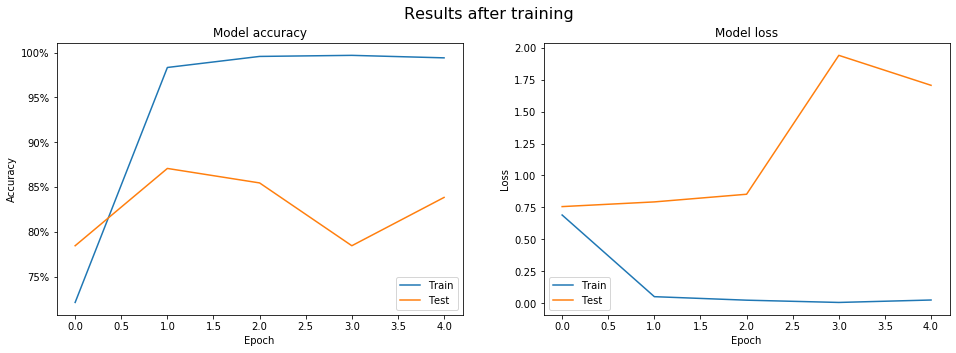

In [19]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Results after training', fontsize=16)

# summarize history for accuracy
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Test'], loc='lower right')

# summarize history for loss
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Test'], loc='lower left')

plt.show()